Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

Data Collection and Processing

In [ ]:
# initializing our dataset
heart_data = pd.read_csv('/content/heart.csv')

In [ ]:
# checking our first 5 and last 5 dataset
heart_data.head(10)
#heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
# r x c shapes into tuple from md array
heart_data.shape
# column type
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# checking for null or missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#handles missing values
#heart_data = heart_data.fillna(heart_data.mean())

In [ ]:
# statistics min-low
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Target Variable distribution
# here 0 is defective and 1 is healthy
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

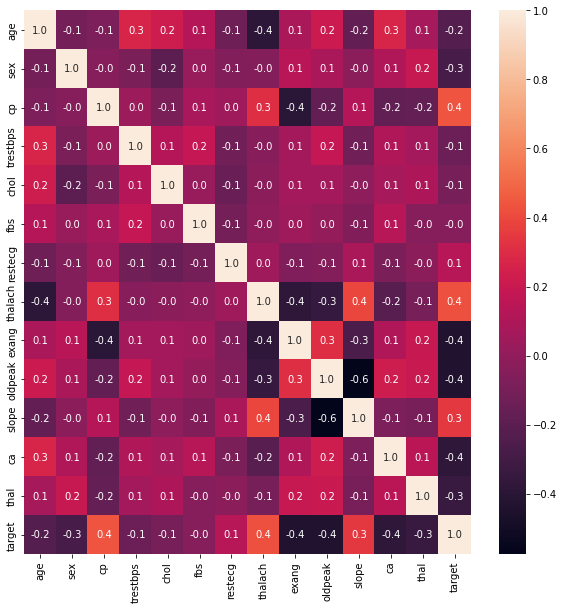

In [ ]:



















































# co-relation heatmap
correlation = heart_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,fmt='.1f')

Splitting the Features and Target

In [ ]:
X = heart_data.drop(columns='target', axis=1) #only features
Y = heart_data['target'] # label or results

Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (768, 13) (257, 13)


                                                                  Model Training

Using Logistic Regression model

Accuracy on Training data :  0.8697916666666666
Accuracy on Test data :  0.8054474708171206


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


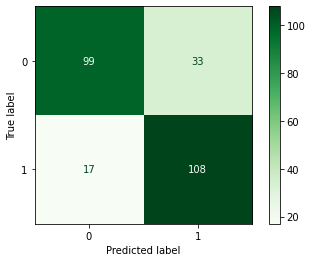

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       132
           1       0.77      0.86      0.81       125

    accuracy                           0.81       257
   macro avg       0.81      0.81      0.81       257
weighted avg       0.81      0.81      0.81       257



In [ ]:
logisticRegreg = LogisticRegression()
# training the LogisticRegression model with Training data
logisticRegreg.fit(X_train, Y_train)

# accuracy on training data
X_train_prediction = logisticRegreg.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

# accuracy on test data
X_test_prediction = logisticRegreg.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

#Visualization using confusion matrice
conf = confusion_matrix(X_test_prediction,Y_test)
plot_confusion_matrix(logisticRegreg,X_test,Y_test, cmap="Greens")
plt.show()
print(classification_report(Y_test,X_test_prediction))

Using Naive Bayes model gaussian method

Accuracy on Training data :  0.84375
Accuracy on test data :  0.7937743190661478


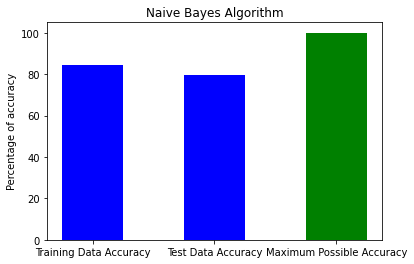

              precision    recall  f1-score   support

           0       0.85      0.73      0.78       132
           1       0.75      0.86      0.80       125

    accuracy                           0.79       257
   macro avg       0.80      0.80      0.79       257
weighted avg       0.80      0.79      0.79       257



In [ ]:
naiveBayes = GaussianNB()
naiveBayes = naiveBayes.fit(X_train, Y_train)


# accuracy on training data
X_train_prediction = naiveBayes.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

# accuracy on test data
X_test_prediction = naiveBayes.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

#Visualization Bar Chart
print('Accuracy on test data : ', test_data_accuracy)
plt.bar(["Training Data Accuracy","Test Data Accuracy","Maximum Possible Accuracy"],[training_data_accuracy*100,test_data_accuracy*100,100],color=["blue","blue","green"],width= 0.5)
plt.title("Naive Bayes Algorithm")
plt.ylabel("Percentage of accuracy")
plt.show()
print(classification_report(Y_test,X_test_prediction))

Using Decision tree

Accuracy on Training data :  1.0
Accuracy on test data :  0.9766536964980544


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


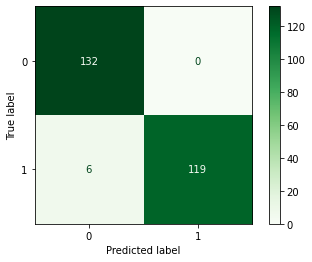

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       132
           1       1.00      0.95      0.98       125

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257



In [ ]:
disTreeClassifier = tree.DecisionTreeClassifier()


disTreeClassifier = disTreeClassifier.fit(X_train, Y_train)
X_train_prediction = disTreeClassifier.predict(X_train)

# accuracy on training data
X_train_prediction = disTreeClassifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

# accuracy on test data
X_test_prediction = disTreeClassifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', test_data_accuracy)

#Visualization
conf = confusion_matrix(X_test_prediction,Y_test)
plot_confusion_matrix(disTreeClassifier,X_test,Y_test, cmap="Greens")
plt.show()
print(classification_report(Y_test,X_test_prediction))

Accuracy on Training data :  1.0
Accuracy on test data :  0.9883268482490273


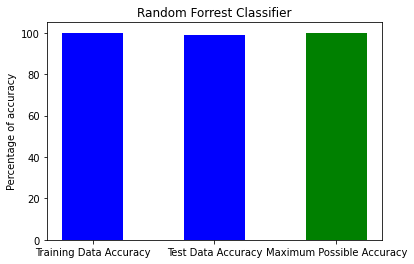

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       132
           1       1.00      0.98      0.99       125

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



In [ ]:
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,Y_train)

# accuracy on training data
X_train_prediction = RandomForest.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

# accuracy on test data
X_test_prediction = RandomForest.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', test_data_accuracy)

#Visualization 
plt.bar(["Training Data Accuracy","Test Data Accuracy","Maximum Possible Accuracy"],[training_data_accuracy*100,test_data_accuracy*100,100],color=["blue","blue","green"],width= 0.5)
plt.title("Random Forrest Classifier")
plt.ylabel("Percentage of accuracy")
plt.show()
print(classification_report(Y_test,X_test_prediction))

Building a Predictive System

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

print("prediction of Decision tree")
prediction = disTreeClassifier.predict(input_data_reshaped)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease\n')
else:
  print('The Person has Heart Disease\n')

print("prediction of naive Bayes model")

prediction = naiveBayes.predict(input_data_reshaped)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease\n')
else:
  print('The Person has Heart Disease\n')

print("prediction of logistic regression model")

prediction = logisticRegreg.predict(input_data_reshaped)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease\n')
else:
  print('The Person has Heart Disease\n')

print("prediction of Random Forest classifier model")

prediction = RandomForest.predict(input_data_reshaped)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease\n')
else:
  print('The Person has Heart Disease\n')

prediction of Decision tree
The Person does not have a Heart Disease

prediction of naive Bayes model
The Person does not have a Heart Disease

prediction of logistic regression model
The Person does not have a Heart Disease

prediction of Random Forest classifier model
The Person does not have a Heart Disease



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
